In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [260]:
df = pd.read_csv('dataset.csv')
df1 = pd.read_csv('dataset.csv')
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Data Cleaning

In [262]:
# Rename Column
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [263]:
# Feature selection
df.drop(df[['posted_on', 'area_locality', 'point_of_contact']],axis = 1, inplace = True)


In [264]:
# # Feature engineering
# df['floor'] = df['floor'].str.replace('Ground', '0')
# df['floor'] = df['floor'].str.replace('Upper Basement', '-1')
# df['floor'] = df['floor'].str.replace('Lower Basement', '-2')

# df[['floor', 'total_floor']] = df['floor'].str.extract(r'^(.*?)\s+out\s+of\s+(.*?)$')

In [265]:
# # NaN value from feature engineering
# df[pd.isnull(df).any(axis=1)]

In [266]:
# # Remove 4 missing row
# df.dropna(axis = 0, inplace = True)
# # Fix data type
# df[['floor', 'total_floor']] = df[['floor', 'total_floor']].astype('int64')

In [267]:
# Or... just delete it altogether
df.drop(columns='floor', inplace = True)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bhk                4746 non-null   int64 
 1   rent               4746 non-null   int64 
 2   size               4746 non-null   int64 
 3   area_type          4746 non-null   object
 4   city               4746 non-null   object
 5   furnishing_status  4746 non-null   object
 6   tenant_preferred   4746 non-null   object
 7   bathroom           4746 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 296.8+ KB


In [269]:
# Divide feature
catfeat = df.select_dtypes(include = 'object').columns.to_list()
numfeat = df.select_dtypes(include = 'number').columns.to_list()

## EDA

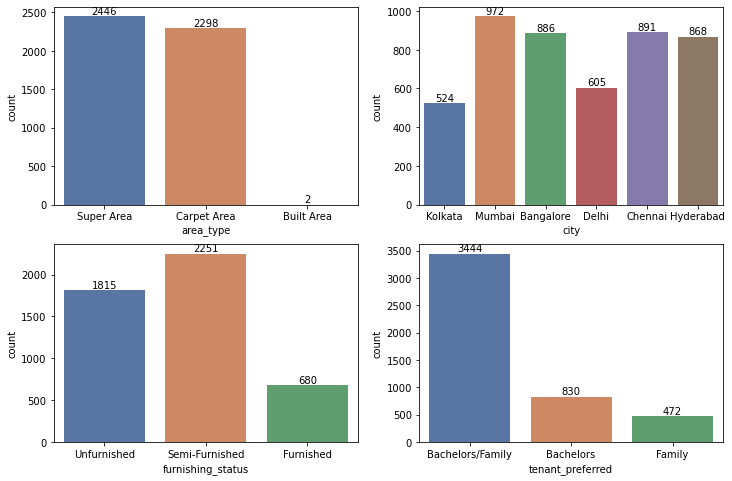

In [270]:
plt.figure(figsize = (12,8))

for i in catfeat :
    plt.subplot(2, 2, catfeat.index(i) + 1)
    ax = sns.countplot(data = df, x = df[i], palette='deep')
    ax.bar_label(ax.containers[0])

    
plt.show()

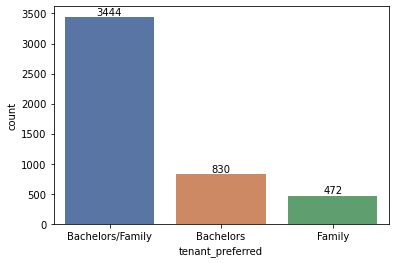

In [271]:
ax = sns.countplot(data = df, x = df['tenant_preferred'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

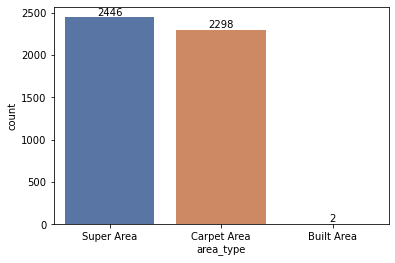

In [272]:
ax = sns.countplot(data = df, x = df['area_type'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

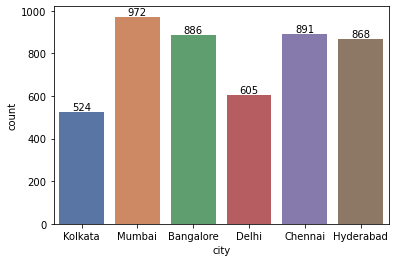

In [273]:
ax = sns.countplot(data = df, x = df['city'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

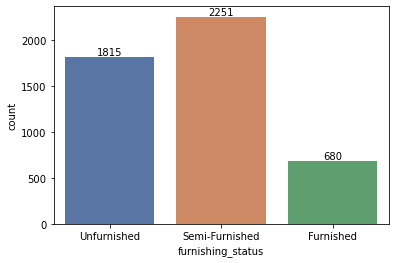

In [274]:
ax = sns.countplot(data = df, x = df['furnishing_status'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

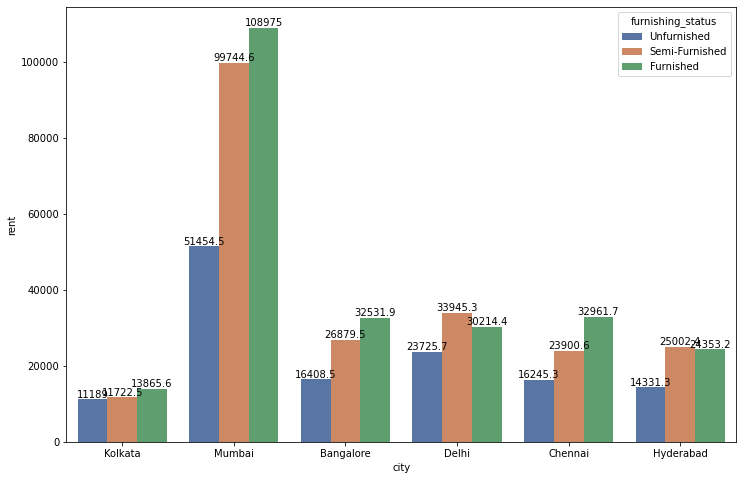

In [275]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'] ,hue = df['furnishing_status'], palette='deep', ci = 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

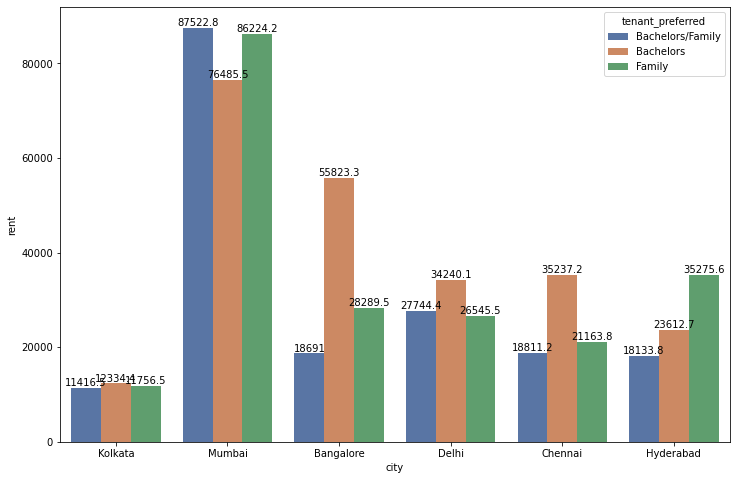

In [276]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'] ,hue = df['tenant_preferred'], palette='deep', ci = 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()

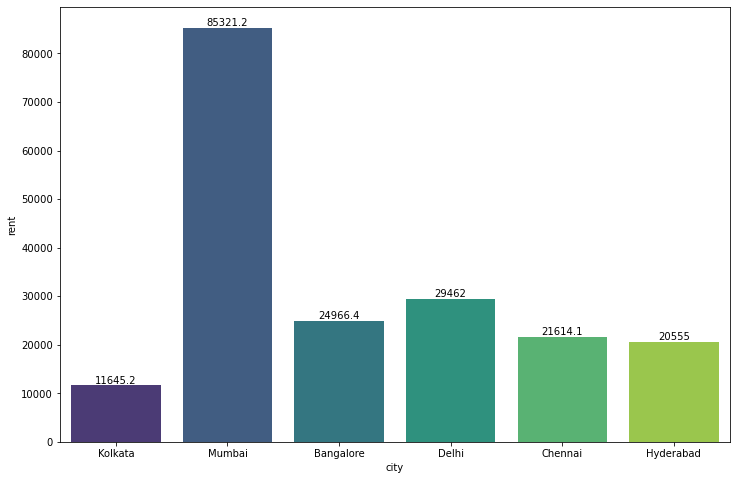

In [277]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = df, x = df['city'], y = df['rent'], palette='viridis', ci = 0)
ax.bar_label(ax.containers[0])
plt.show()

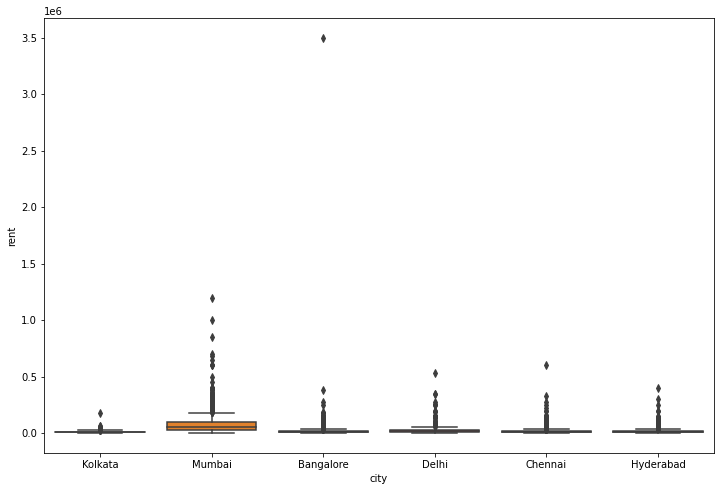

In [282]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = df['city'], y = df['rent'])
plt.show()

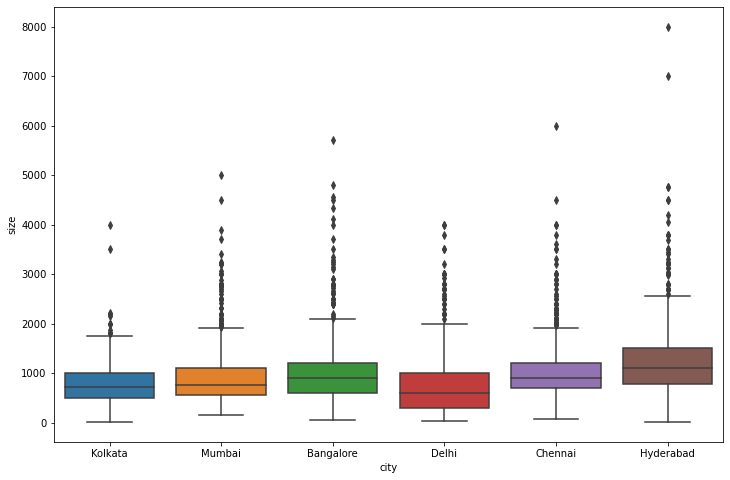

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = df['city'], y = df['size'])
plt.show()

In [285]:
df[df['rent'] > 3000000]

,bhk,rent,size,area_type,city,furnishing_status,tenant_preferred,bathroom


In [284]:
# Remove outlier
df.drop(index=1837, inplace=True)

<AxesSubplot:xlabel='size', ylabel='Count'>

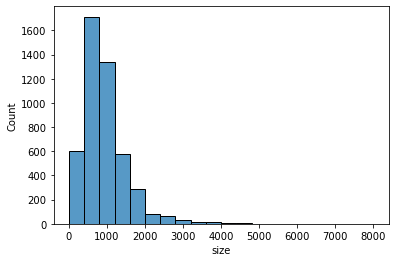

In [287]:
sns.histplot(df['size'], bins = 20)

<AxesSubplot:xlabel='city', ylabel='bhk'>

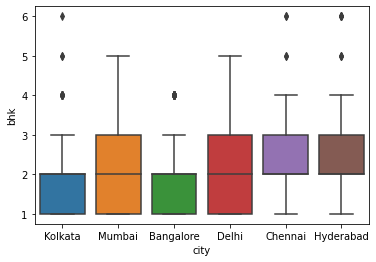

In [288]:
sns.boxplot(x = df['city'], y = df['bhk'])

<AxesSubplot:xlabel='city', ylabel='bathroom'>

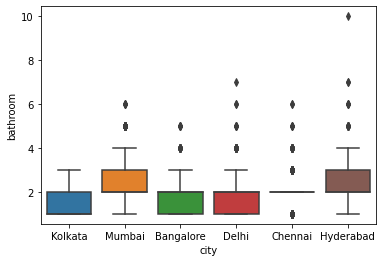

In [289]:
sns.boxplot(x = df['city'], y = df['bathroom'])

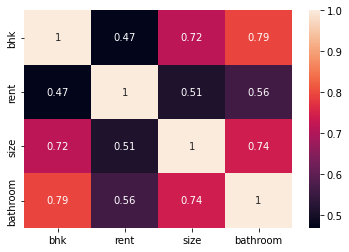

In [233]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocessing

In [185]:
def oneh_encoding(df) :
    df_copy = df.copy()
    catcol = df_copy.select_dtypes('object').columns.to_list()
        
    df_copy = pd.get_dummies(df, columns = catcol)
    
    return df_copy

def label_encoder(df) :
    df_copy = df.copy()
    catcol = df_copy.select_dtypes('object').columns.to_list()
    
    LabelEncoding = LabelEncoder()
    
    for i in catcol :
        df_copy[i] = LabelEncoding.fit_transform(df_copy[i])

    return df_copy

In [186]:
X = df.drop(columns = 'rent')
y = df['rent']

In [187]:
# Normalization, because the data distribution isn't normal distribution
catfeat = X.select_dtypes(include = 'object').columns.to_list()
numfeat = X.select_dtypes(include = 'number').columns.to_list()

X_cat = X[catfeat]
X_num = X[numfeat]

scaler = MinMaxScaler()

scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

X_cat = oneh_encoding(X_cat)

X_cat = X_cat.reset_index(drop=True)
X_num_scaled = X_num_scaled.reset_index(drop=True)

X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [21]:
# Ver 2, label encoder
catfeat = X.select_dtypes(include = 'object').columns.to_list()
numfeat = X.select_dtypes(include = 'number').columns.to_list()

X_cat = X[catfeat]
X_num = X[numfeat]

scaler = MinMaxScaler()

scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

X_cat = label_encoder(X_cat)

X_cat = X_cat.reset_index(drop=True)
X_num_scaled = X_num_scaled.reset_index(drop=True)

X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size = .2)

## Modeling

In [189]:
def benchmark(model):
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

  print('For testing data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
  print("R2 Score: {:.2f}".format(r2_score(y_test, y_test_pred)))

In [191]:
benchmark(LinearRegression())

For training data ---------
Mean Absolute Error: 18195.73
Mean Squared Error: 1133656903.84
R2 Score: 0.61 

For testing data ---------
Mean Absolute Error: 22473.50
Mean Squared Error: 3612830994.29
R2 Score: 0.41


In [192]:
benchmark(DecisionTreeRegressor())

For training data ---------
Mean Absolute Error: 591.91
Mean Squared Error: 5552242.92
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 16143.23
Mean Squared Error: 2476451783.46
R2 Score: 0.59


In [193]:
benchmark(KNeighborsRegressor())

For training data ---------
Mean Absolute Error: 12122.86
Mean Squared Error: 907133681.76
R2 Score: 0.69 

For testing data ---------
Mean Absolute Error: 17449.88
Mean Squared Error: 3709113390.79
R2 Score: 0.39


In [194]:
benchmark(XGBRegressor())

c:\Users\Roy Andhika\miniconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


For training data ---------
Mean Absolute Error: 6019.90
Mean Squared Error: 148657114.38
R2 Score: 0.95 

For testing data ---------
Mean Absolute Error: 13212.66
Mean Squared Error: 2290891653.89
R2 Score: 0.62


In [195]:
benchmark(RandomForestRegressor())

For training data ---------
Mean Absolute Error: 4618.07
Mean Squared Error: 131349251.57
R2 Score: 0.96 

For testing data ---------
Mean Absolute Error: 13185.30
Mean Squared Error: 1926828811.14
R2 Score: 0.68


In [196]:
benchmark(GradientBoostingRegressor())

For training data ---------
Mean Absolute Error: 9954.33
Mean Squared Error: 461211508.64
R2 Score: 0.84 

For testing data ---------
Mean Absolute Error: 13598.39
Mean Squared Error: 2058277156.57
R2 Score: 0.66
